<a href="https://colab.research.google.com/github/Samiimasmoudii/Deep-Learning-Course/blob/main/LabCNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Création du modèle CNN**

In [8]:
# Importation des bibliothèques nécessaires de TensorFlow Keras
from tensorflow.keras.models import Sequential  # Pour créer des modèles séquentiels
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D  # Pour les différentes couches du réseau
import matplotlib.pyplot as plt


In [9]:
# Création d'un modèle séquentiel
model = Sequential()

In [12]:
# Ajout de la première couche convolutionnelle avec 32 filtres, une taille de noyau de 3x3, activation ReLU, et forme d'entrée 28x28x1 (images MNIST en niveaux de gris)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Ajout d'une couche de pooling maximal avec une taille de pool de 2x2 pour réduire la dimensionnalité
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
# Ajout d'une couche de mise à plat pour transformer les matrices de caractéristiques en vecteurs
model.add(Flatten())

In [15]:
# Ajout d'une couche dense entièrement connectée avec 128 neurones et activation ReLU
model.add(Dense(128, activation='relu'))

In [16]:
# Ajout de la couche de sortie dense avec 10 neurones (pour les 10 classes de chiffres MNIST) et activation softmax pour la classification
model.add(Dense(10, activation='softmax'))

In [17]:
# Compilation du modèle avec l'optimiseur Adam, la perte catégorielle croisée et la métrique de précision
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Affichage du résumé du modèle pour voir l'architecture et les paramètres
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Chargement des données MNIST et prétraitement
from tensorflow.keras.datasets import mnist  # Importation du jeu de données MNIST
from tensorflow.keras.utils import to_categorical  # Pour convertir les labels en format one-hot


In [20]:
# Chargement des données d'entraînement et de test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
# Redimensionnement des images en ajoutant une dimension de canal et normalisation des valeurs de pixels à l'échelle [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [22]:
# Conversion des labels en format one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [33]:
# Entraînement du modèle sur les données d'entraînement avec une taille de batch de 128 et pour 10 époques
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.9945 - loss: 0.0205 - val_accuracy: 0.9877 - val_loss: 0.0455
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.9987 - loss: 0.0053 - val_accuracy: 0.9863 - val_loss: 0.0500
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.9869 - val_loss: 0.0507
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9881 - val_loss: 0.0505
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9998 - loss: 8.9654e-04 - val_accuracy: 0.9873 - val_loss: 0.0510
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9998 - loss: 7.7340e-04 - val_accuracy: 0.9857 - val_loss: 0.0592
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9979 - loss: 0.0059 - val_accuracy: 0.9850 - val_loss: 0.0633
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.9988 - loss: 0

In [34]:
# Évaluation du modèle sur les données de test pour obtenir la perte et la précision
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9851 - loss: 0.0658


In [35]:
# Affichage de la perte et de la précision sur le jeu de données de test
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05533835291862488
Test accuracy: 0.9879000186920166


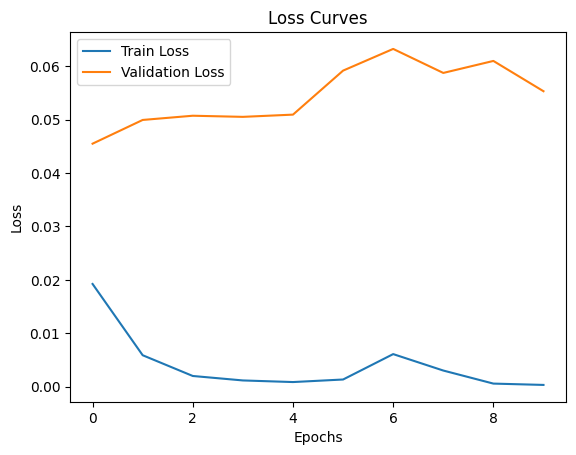

In [36]:
# Tracé de la courbe de perte
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

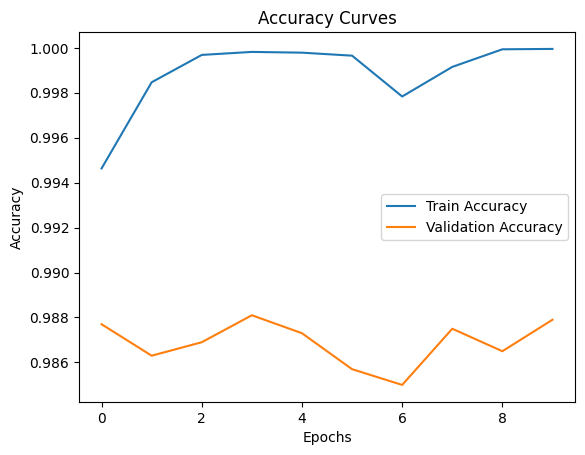

In [37]:
# Tracé de la courbe de précision
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [39]:
# Prédictions du modèle sur les données de test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [40]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

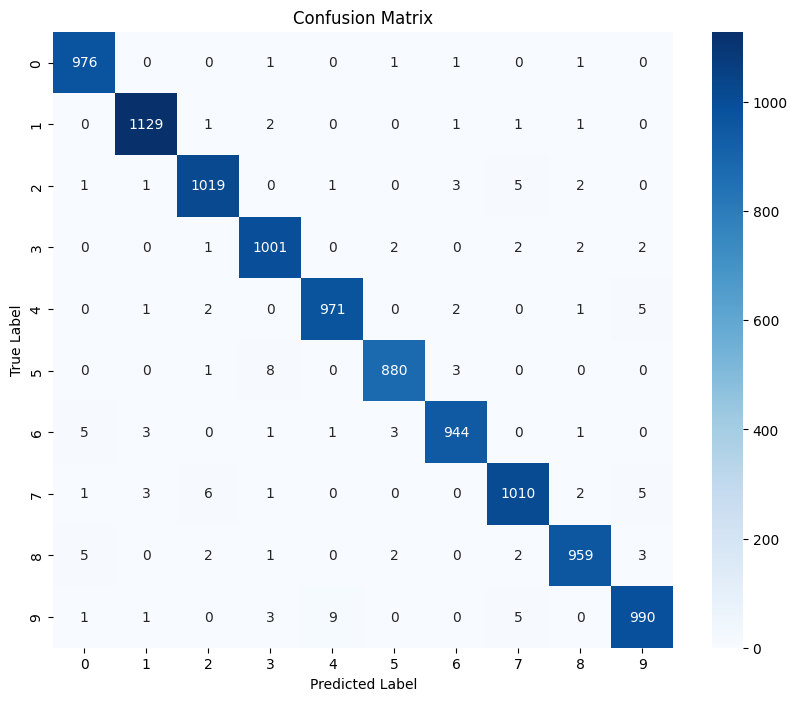

In [41]:
# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()